In [30]:
import time
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_start_sites = pd.read_csv("../data/positive_strand_start_sites.tsv", sep="\t")
df_reads = pd.read_csv("../data/positive_strand_reads.tsv", sep="\t")

df_start_sites.shape, df_reads.shape

((2109, 2), (4641652, 19))

In [4]:
df_start_sites.head()

,gene,start_position
0,b0001,190
1,b0002,337
2,b0003,2801
3,b0004,3734
4,b0005,5234


In [5]:
df_reads.head()

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31
0,1,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Reads should be non-zero at start sites.

In [6]:
df_reads[df_reads['position'].isin([df_start_sites.loc[0, "start_position"]])]

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31
189,190,A,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0


In [7]:
df_reads[df_reads['position'].isin([df_start_sites.loc[1, "start_position"]])]

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31
336,337,A,27,21,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [8]:
df_reads[df_reads['position'].isin([df_start_sites.loc[6, "start_position"]])]

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31
9305,9306,A,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [9]:
df_reads[df_reads['position'].isin(df_start_sites["start_position"].values)]['letter'].value_counts()

A    1896
G     164
T      44
C       4
Name: letter, dtype: int64

In [10]:
RL_COLS = ['rl_15', 'rl_16', 'rl_17', 'rl_18', 'rl_19',
           'rl_20', 'rl_21', 'rl_22', 'rl_23', 'rl_24', 
           'rl_25', 'rl_26', 'rl_27', 'rl_28', 'rl_29', 
           'rl_30', 'rl_31']

In [11]:
row = df_reads.loc[0]

any([row[col] for col in RL_COLS])

False

In [12]:
def non_zero_read_lengths(row):
    return any([row[col] for col in RL_COLS])

In [13]:
df_reads['is_non_zero_length'] = df_reads.apply(non_zero_read_lengths, axis=1)

In [14]:
df_reads['is_non_zero_length'].value_counts()

False    4544928
True       96724
Name: is_non_zero_length, dtype: int64

In [15]:
df_reads[(df_reads['position'].isin(df_start_sites["start_position"].values))]['is_non_zero_length'].value_counts(normalize=True)

False    0.61575
True     0.38425
Name: is_non_zero_length, dtype: float64

In [16]:
df_reads.groupby(['letter']).agg({'is_non_zero_length': 'sum'})

,is_non_zero_length
letter,
A,22183
C,23662
G,32641
T,18238


In [17]:
df_reads[(df_reads['position'].isin(df_start_sites["start_position"].values)) & \
        (~df_reads['is_non_zero_length'])]

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31,is_non_zero_length
2800,2801,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
5233,5234,G,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
10829,10830,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
14167,14168,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
15444,15445,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4636006,4636007,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4636695,4636696,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4638177,4638178,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4640401,4640402,A,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [18]:
df_reads[(df_reads['position'].isin(df_start_sites["start_position"].values)) & \
        (df_reads['is_non_zero_length'])]

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31,is_non_zero_length
189,190,A,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,True
336,337,A,27,21,10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,True
3733,3734,A,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
8237,8238,A,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
9305,9306,A,8,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4618228,4618229,T,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4619602,4619603,A,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4620882,4620883,A,3,3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,True
4627314,4627315,A,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,True


In [19]:
def hist_from_start_pos(df, pos, rl_cols, window_size=15):
    left_marker, right_marker = pos - window_size, pos + window_size
    left_marker = left_marker if left_marker > 0 else 0
    right_marker = right_marker if right_marker < df.shape[0]-1 else df.shape[0]-1
    
    total_reads = np.sum(df.loc[left_marker:right_marker, rl_cols].values, axis=1)
    position = [i for i in range(left_marker, right_marker+1)]

    data = pd.DataFrame({"total_reads": total_reads, "position": position})
    
    title_str = "Read length distribution with start position = " + str(pos)
    
    ax = sns.barplot(x='position', y='total_reads', data=data)
    plt.xticks(rotation=90, fontsize=8)
    plt.title(title_str)
    plt.show()

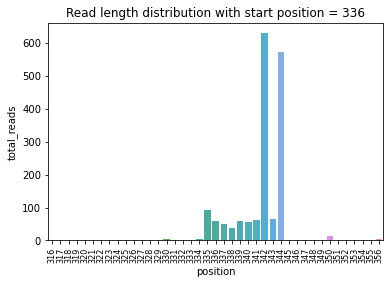

In [20]:
hist_from_start_pos(df_reads, 336, RL_COLS, window_size=20)

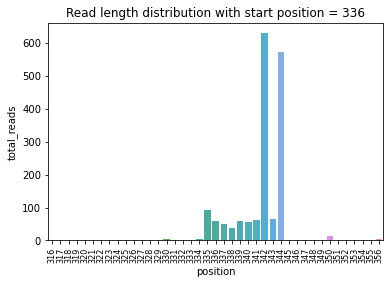

In [21]:
hist_from_start_pos(df_reads, 336, RL_COLS, window_size=20)

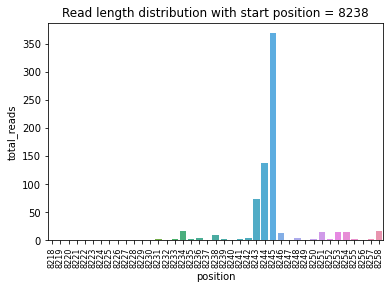

In [22]:
hist_from_start_pos(df_reads, 8238, RL_COLS, window_size=20)

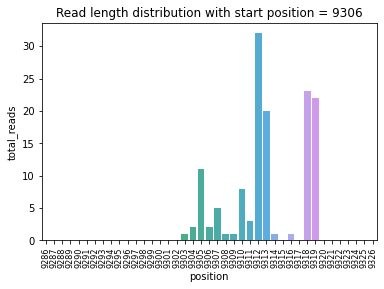

In [23]:
hist_from_start_pos(df_reads, 9306, RL_COLS, window_size=20)

In [24]:
df_reads.columns

Index(['position', 'letter', 'rl_15', 'rl_16', 'rl_17', 'rl_18', 'rl_19',
       'rl_20', 'rl_21', 'rl_22', 'rl_23', 'rl_24', 'rl_25', 'rl_26', 'rl_27',
       'rl_28', 'rl_29', 'rl_30', 'rl_31', 'is_non_zero_length'],
      dtype='object')

In [63]:
class DistributionCreator:

    def __init__(self, df, rl_cols, window_size=15):
        self.df = df
        self.rl_cols = rl_cols
        self.window_size = window_size
    
    def create_read_distribution_cols_for_position(self, row):
        pos = row['position']
        
        if pos % 1000 == 0:
            print(str(pos*100/self.df.shape[0]) + "% complete.")
            
        # print(pos)
        
        left_marker, right_marker = pos - self.window_size, pos + self.window_size
        left_marker = left_marker if left_marker >= 1 else 1
        right_marker = right_marker if right_marker <= self.df.shape[0] else self.df.shape[0]
        
        # print(left_marker, right_marker)
        
        window = self.df[(self.df['position'] >= left_marker) & (self.df['position'] <= right_marker)][self.rl_cols].values
        
        # print(window)

        total_reads = np.sum(window, axis=1)
        
        # print(total_reads)
        
        position = list(range(left_marker, right_marker+1))
        pos_diffs = ['reads_pos' + str(i - pos) if i - pos < 0 else 'reads_pos+' + str(i - pos) for i in position]
        
        # print(pos_diffs)
        
        assert len(pos_diffs) == len(total_reads)
        
        for i in range(len(pos_diffs)):
            row[pos_diffs[i]] = total_reads[i]

        return row

In [64]:
df_test = df_reads.loc[:250]
df_test.shape

(251, 20)

In [65]:
dc = DistributionCreator(df_test, RL_COLS)

In [57]:
t0 = time.time()
df_trans_pandas = df_test.apply(dc.create_read_distribution_cols_for_position, axis=1)
print("Time taken =", time.time() - t0, "s")

1
1 16
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
['reads_pos+0', 'reads_pos+1', 'reads_pos+2', 'reads_pos+3', 'reads_pos+4', 'reads_pos+5', 'reads_pos+6', 'reads_pos+7', 'reads_pos+8', 'reads_pos+9', 'reads_pos+10', 'reads_pos+11', 'reads_pos+12', 'reads_pos+13', 'reads_pos+14', 'reads_pos+15']
2
1 17
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 

25
10 40
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0

46
31 61
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0

67
52 82
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0

87
72 102
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 

107
92 122
[[0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0

127
112 142
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 

146
131 161
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 

166
151 181
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 

185
170 200
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

204
189 219
[[  1   4   0   2   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1   0   2   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   2   0   3   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   1   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  5   1   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1  15   1   2   0   0   0   0   1   0   0   0   0   0   0   0   0]
 [ 18   8 111   1   3   1   0   0   1   0   0   1   0   0   0   0   0]
 [ 55 102  21  95   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  2  40  17   1   7   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   1   2   0   0   1   0   0   0   0   0   0   0   0   0   0   0]
 [  0   1   0   6   1   0   1   0   0   0   0   0   0   0   0   0   0]
 [  1   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0

223
208 238
[[1 3 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0]
 [0 2 0 0 0 2 3 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0]
 [0 2 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 

242
227 251
[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [5 0 0 6 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
[ 0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  

In [58]:
df_trans_pandas

,is_non_zero_length,letter,position,reads_pos+0,reads_pos+1,reads_pos+10,reads_pos+11,reads_pos+12,reads_pos+13,reads_pos+14,...,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31
0,False,A,1,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,False,G,2,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
2,False,C,3,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,False,T,4,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,False,T,5,0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,False,G,247,0,0.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
247,False,C,248,0,12.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
248,True,G,249,12,1.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0
249,True,G,250,1,2.0,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_reads.tail()

,position,letter,rl_15,rl_16,rl_17,rl_18,rl_19,rl_20,rl_21,rl_22,rl_23,rl_24,rl_25,rl_26,rl_27,rl_28,rl_29,rl_30,rl_31,is_non_zero_length
4641647,4641648,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4641648,4641649,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4641649,4641650,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4641650,4641651,T,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False
4641651,4641652,C,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,False


In [53]:
df_reads.shape[0]

4641652

In [60]:
import dask.dataframe as dd
from dask.multiprocessing import get

In [70]:
from pandarallel import pandarallel

In [69]:
!pip3 install pandarallel

  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 86 kB 7.9 MB/s             
  Created wheel for pandarallel: filename=pandarallel-1.5.4-py3-none-any.whl size=18678 sha256=e907eaa323bbea15bf025d9bc3d68d0d666a8a8ff84f14d5fade873145f9b75c
  Stored in directory: /Users/vedang/Library/Caches/pip/wheels/42/6c/9b/e3ed6ef75e1a229c833afab04758eeac55ec7bd2a2f879a2eb
Successfully built pandarallel
You should consider upgrading via the '/Users/vedang/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [67]:
dd_test = dd.from_pandas(df_test, npartitions=3)

dd_trans = dd_test.map_partitions(lambda df: df.apply(dc.create_read_distribution_cols_for_position, axis=1)).compute(
    scheduler='threads')

<ipython-input-63-ead00f9337e0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[pos_diffs[i]] = total_reads[i]
/Users/vedang/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value, self.name)
<ipython-input-63-ead00f9337e0>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row[pos_diffs[i]] = total_reads[i]
/Users/vedang/opt/an

ValueError: The columns in the computed data do not match the columns in the provided metadata
  Extra:   ['reads_pos-1', 'reads_pos-10', 'reads_pos-11', 'reads_pos-12', 'reads_pos-13', 'reads_pos-14', 'reads_pos-15', 'reads_pos-2', 'reads_pos-3', 'reads_pos-4', 'reads_pos-5', 'reads_pos-6', 'reads_pos-7', 'reads_pos-8', 'reads_pos-9']
  Missing: []

In [71]:
pandarallel.initialize()

INFO: Pandarallel will run on 8 workers.
INFO: Pandarallel will use standard multiprocessing data transfer (pipe) to transfer data between the main process and workers.


In [72]:
df_trans_pandarallel = df_test.parallel_apply(dc.create_read_distribution_cols_for_position, axis=1)

In [74]:
all(df_trans_pandarallel == df_trans_pandas)

True